# Assignment 8: More Xarray with El Niño-Southern Oscillation (ENSO) Data

Here will will calculate the NINO 3.4 index of El Nino variabillity and use it to analyze datasets.

First read this page from NOAA. It tells you the following:

The Niño 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.

Warm or cold phases of the Oceanic Niño Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above the threshold of +0.5°C (warm), or below the threshold of -0.5°C (cold). This is known as the Oceanic Niño Index (ONI).

(Note that “anomaly” means that the seasonal cycle, also called the “climatology” has been removed.)

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%xmode Minimal

Exception reporting mode: Minimal


## 1. Reproduce the SST curve from the figure below
Use the sst.mnmean.nc file that we worked with in class, located at http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc.

You don’t have to match the stylistic details, or use different colors above and below zero, just the “3mth running mean” curve.
Load the data as an Xarray dataset. Drop the time_bnds variable as we did in class and trim the data to 1950 onward for this assignment.

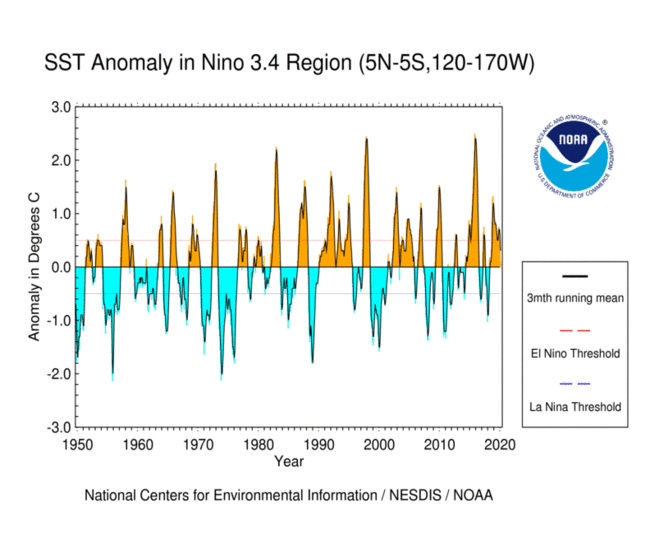

Now calculate the climatology and the SST anomaly.

Now reproduce the plot. Keep the rolling 3-month average of the SST anomaly as a DataArray for the next question.

In [3]:
# Load data
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1950', '2022')).load()
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 873)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-09-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2022-10-04
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
#Create Climatology- group by the month
gb = ds.groupby('time.month')
gb

DatasetGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [5]:
# Remove mean and create anomaly data
ds_anom = gb - gb.mean(dim='time')
ds_anom

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 873)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-09-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 11 12 1 2 3 4 5 6 7 8 9
Data variables:
    sst      (time, lat, lon) float32 1.192e-07 1.192e-07 1.192e-07 ... nan nan

In [6]:
#Region of Interest (ROI) Selection 5N-5S, 120W - 170 W
roi = ds_anom.sel(lat = slice(5, -5), lon = slice(360 - 170, 360 - 120))
roi

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 873)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-09-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 11 12 1 2 3 4 5 6 7 8 9
Data variables:
    sst      (time, lat, lon) float32 -1.162 -1.237 -1.35 ... -0.8603 -0.8461

In [7]:
# 3 month running mean 
roi_rolling = roi.rolling(time=3, center=True).mean()
roi_rolling

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 873)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-09-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 11 12 1 2 3 4 5 6 7 8 9
Data variables:
    sst      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [8]:
roi_rolling_mean = roi_rolling.mean(dim = ('lat', 'lon'))
roi_rolling_mean

<xarray.Dataset>
Dimensions:  (time: 873)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-09-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 11 12 1 2 3 4 5 6 7 8 9
Data variables:
    sst      (time) float32 nan -1.553 -1.363 -1.341 ... -0.5968 -0.7255 nan

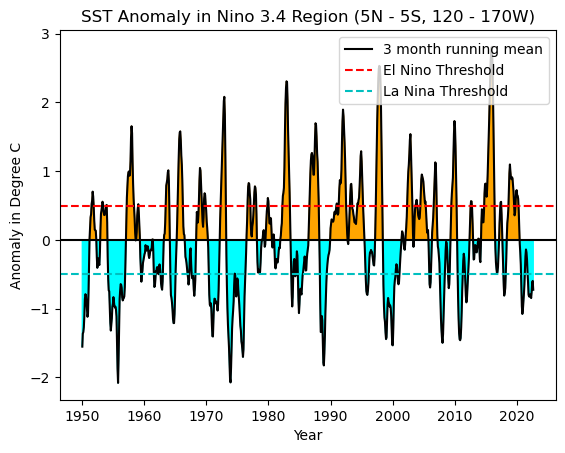

In [9]:
fig, ax = plt.subplots(ncols = 1)
ax.plot(roi_rolling_mean.time, roi_rolling_mean.sst, label = '3 month running mean', c = 'k')
ax.axhline(0, c ='k')
ax.axhline(0.5, c = 'r', linestyle='dashed', label = 'El Nino Threshold')
ax.fill_between(roi_rolling_mean.time, roi_rolling_mean.sst, where=roi_rolling_mean.sst>=0, interpolate=True, color='orange')
ax.fill_between(roi_rolling_mean.time, roi_rolling_mean.sst, where=roi_rolling_mean.sst<=0, interpolate=True, color='cyan')
ax.axhline(-0.5, c = 'c', linestyle='dashed', label = 'La Nina Threshold')
#ax.fill_between( x = )
ax.set_xlabel('Year')
ax.set_ylabel('Anomaly in Degree C')
ax.set_title('SST Anomaly in Nino 3.4 Region (5N - 5S, 120 - 170W)')
ax.legend(loc = "upper right")
#ax.set_xlim(1950-1-1, 2022-10-31)
plt.show()

## 2. Calculate boolean timeseries representing the positive / negative ENSO phases
Refer to the definitions of warm/cold phases above.

Plot them somehow.

In [10]:
pos_ONI = (((roi_rolling_mean.sst >= 0.5).rolling(time = 5, center = True).sum() == 5)).rolling(time = 5, center = True).max()
pos_ONI.data = np.nan_to_num(pos_ONI.data).astype(bool)
neg_ONI = (((roi_rolling_mean.sst <= -0.5).rolling(time = 5, center = True).sum() == 5)).rolling(time = 5, center = True).max()
neg_ONI.data = np.nan_to_num(neg_ONI.data).astype(bool) * -1 #C convert cold to negative 

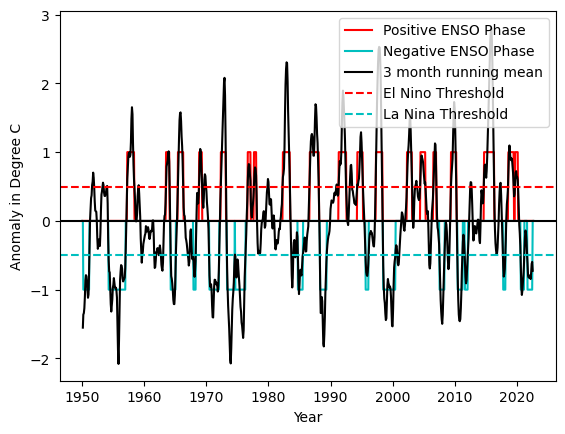

In [11]:
fig, ax = plt.subplots(ncols = 1)
ax.plot(roi_rolling_mean.time, pos_ONI.data, label = 'Positive ENSO Phase', c = 'r')
ax.plot(roi_rolling_mean.time, neg_ONI.data, label = 'Negative ENSO Phase', c = 'c')
ax.plot(roi_rolling_mean.time, roi_rolling_mean.sst, label = '3 month running mean', c = 'k')
ax.axhline(0, c ='k')
ax.axhline(0.5, c = 'r', linestyle='dashed', label = 'El Nino Threshold')
ax.axhline(-0.5, c = 'c', linestyle='dashed' , label = 'La Nina Threshold')
#ax.fill_between( x = )
ax.set_xlabel('Year')
ax.set_ylabel('Anomaly in Degree C')
ax.legend(loc = "upper right")
#ax.set_xlim(1950-1-1, 2022-10-31)
plt.show()

## 3. Plot composites of SST anomaly for the positive and negative ENSO regimes
These should be pcolormesh maps. First positive ONI.
And negative ONI.

In [29]:
pos_ONI_years = np.where(pos_ONI == True)
neg_ONI_years = np.where(neg_ONI == True)
pos_ONI_years

(array([ 87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 162, 163, 164, 165, 166, 167, 168, 185, 186, 187, 188, 189,
        190, 191, 192, 193, 194, 195, 226, 227, 228, 229, 230, 231, 268,
        269, 270, 271, 272, 273, 274, 275, 276, 277, 320, 321, 322, 323,
        324, 325, 332, 333, 334, 335, 336, 388, 389, 390, 391, 392, 393,
        394, 395, 396, 397, 398, 399, 400, 401, 440, 441, 442, 443, 444,
        445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457,
        496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508,
        509, 510, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
        568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580,
        628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 654, 655, 656,
        657, 658, 659, 660, 661, 662, 663, 679, 680, 681, 682, 683, 684,
        713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 777, 778,
        779, 780, 781, 782, 783, 784, 785, 786, 787

In [37]:
first_pos_oni = roi_rolling.sel(time = '1950-1-1')
first_pos_oni

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
    time     datetime64[ns] 1950-01-01
    month    int64 1
Data variables:
    sst      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

TypeError: Dimensions of C (5, 26) are incompatible with X (5) and/or Y (26); see help(pcolormesh)

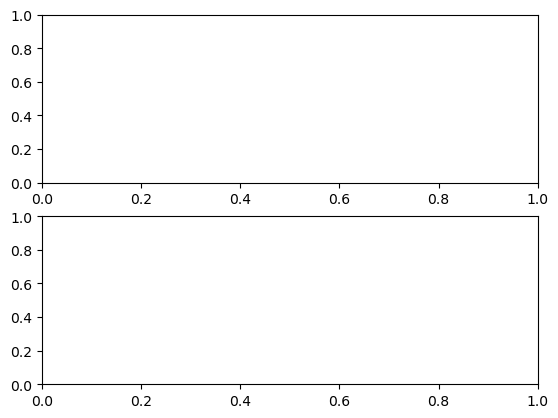

In [40]:
fig, ax = plt.subplots(nrows = 2)
ax[0].pcolormesh(first_pos_oni.lat, first_pos_oni.lon, first_pos_oni.sst)

## 4. Calculate the composite of preciptiation for positive and negative ENSO phases.
First load the precip dataset. Code to fix the broken time coordinate is included.

In [91]:
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS'))
dsp['T'] = true_time
dsp = dsp.rename({'T': 'time'})
dsp.load()

<xarray.Dataset>
Dimensions:  (Y: 72, X: 144, time: 362)
Coordinates:
  * Y        (Y) float32 88.75 86.25 83.75 81.25 ... -81.25 -83.75 -86.25 -88.75
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 1990-02-01
Data variables:
    prcp     (time, Y, X) float32 nan nan nan nan ... 0.02561 0.02394 0.02447
Attributes:
    Conventions:  IRIDL

Now plot the difference between the time-mean of prcp during positive and negative ENSO phases.